# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

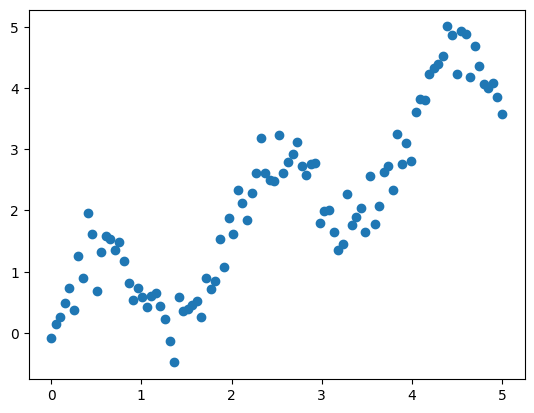

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5297099371376737


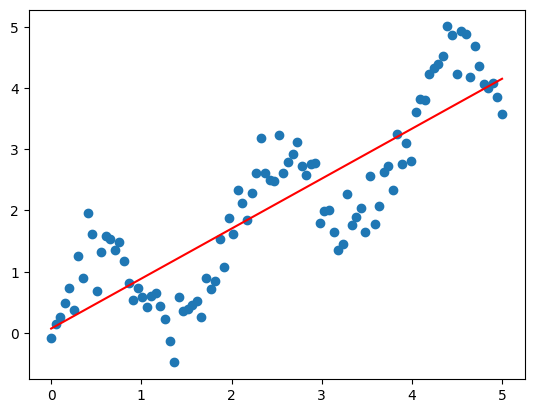

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

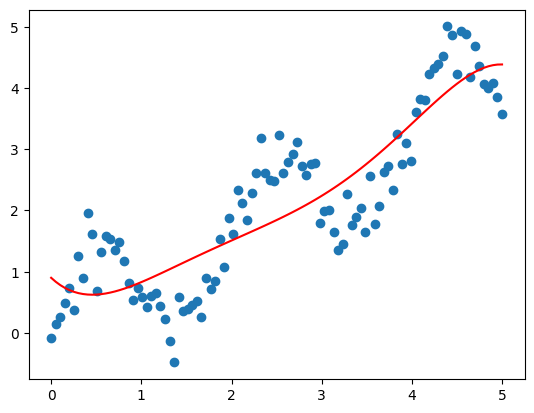

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.3835222   2.12448189 -1.01900464  0.22524919 -0.0179573 ]
interception:  0.9003162404345506


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.90031624, 0.83573061, 0.78121576, 0.73603592, 0.69948907,
       0.67090625, 0.64965083, 0.63511782, 0.62673315, 0.62395297,
       0.62626293, 0.6331775 , 0.64423923, 0.65901804, 0.67711056,
       0.69813935, 0.72175226, 0.74762167, 0.77544383, 0.80493809,
       0.83584627, 0.86793186, 0.9009794 , 0.93479373, 0.96919926,
       1.00403932, 1.03917538, 1.07448642, 1.10986816, 1.14523238,
       1.18050621, 1.2156314 , 1.25056366, 1.2852719 , 1.31973756,
       1.35395386, 1.38792515, 1.42166615, 1.45520126, 1.48856387,
       1.52179563, 1.55494572, 1.58807021, 1.62123129, 1.65449658,
       1.68793844, 1.72163323, 1.75566062, 1.79010291, 1.82504425,
       1.86057   , 1.89676599, 1.93371781, 1.97151014, 2.01022597,
       2.04994596, 2.09074771, 2.13270502, 2.17588724, 2.22035852,
       2.26617711, 2.31339465, 2.36205549, 2.41219592, 2.46384355,
       2.51701652, 2.57172282, 2.62795962, 2.68571249, 2.74495476,
       2.80564676, 2.86773515, 2.93115219, 2.99581504, 3.06162

In [15]:
regr_poly.predict(X_poly)

array([0.90031624, 0.83573061, 0.78121576, 0.73603592, 0.69948907,
       0.67090625, 0.64965083, 0.63511782, 0.62673315, 0.62395297,
       0.62626293, 0.6331775 , 0.64423923, 0.65901804, 0.67711056,
       0.69813935, 0.72175226, 0.74762167, 0.77544383, 0.80493809,
       0.83584627, 0.86793186, 0.9009794 , 0.93479373, 0.96919926,
       1.00403932, 1.03917538, 1.07448642, 1.10986816, 1.14523238,
       1.18050621, 1.2156314 , 1.25056366, 1.2852719 , 1.31973756,
       1.35395386, 1.38792515, 1.42166615, 1.45520126, 1.48856387,
       1.52179563, 1.55494572, 1.58807021, 1.62123129, 1.65449658,
       1.68793844, 1.72163323, 1.75566062, 1.79010291, 1.82504425,
       1.86057   , 1.89676599, 1.93371781, 1.97151014, 2.01022597,
       2.04994596, 2.09074771, 2.13270502, 2.17588724, 2.22035852,
       2.26617711, 2.31339465, 2.36205549, 2.41219592, 2.46384355,
       2.51701652, 2.57172282, 2.62795962, 2.68571249, 2.74495476,
       2.80564676, 2.86773515, 2.93115219, 2.99581504, 3.06162

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

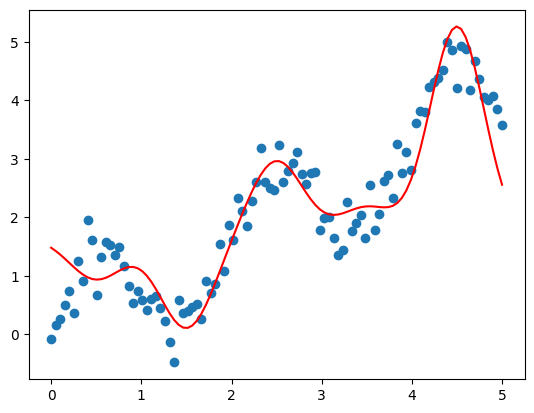

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.71788564 -1.55495368  1.30982429  0.50987846  3.60362664]
interception:  1.6584586745606147


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

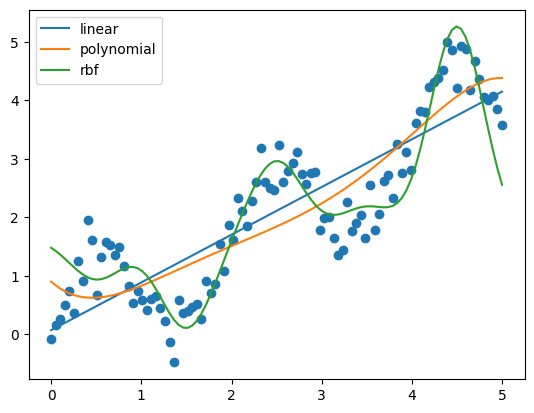

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5297099371376737


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.46474068816904507


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2529008881257052
